# Coding a regression tree

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Then save the dataset into a dataframe (df), and display its first five rows (df.head()):

In [4]:
df = pd.read_csv(r"C:\Users\santh\Downloads\DS_107_possum_dataset.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


(Don’t blindly copy the above code, use the path where your file is located!)

Let’s make a quick overview of our data with df.info():

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


We can conclude that:

* we have 104 rows (104 possums),
* there are 14 columns,
* two columns (age and footlgth) have missing values (we know this because they don’t have 104 non-null values),
* most columns store numerical values (either float64 or int64).

We could try to estimate the missing values, but for this tutorial, we’ll just remove any rows that have a missing value with dropna(), and save the remaining rows into df:

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      101 non-null    int64  
 1   site      101 non-null    int64  
 2   Pop       101 non-null    object 
 3   sex       101 non-null    object 
 4   age       101 non-null    float64
 5   hdlngth   101 non-null    float64
 6   skullw    101 non-null    float64
 7   totlngth  101 non-null    float64
 8   taill     101 non-null    float64
 9   footlgth  101 non-null    float64
 10  earconch  101 non-null    float64
 11  eye       101 non-null    float64
 12  chest     101 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.8+ KB


A second df.info() shows that we’re left with 101 rows to work with. But before we can start coding our regression tree, we do some more cleaning by removing columns that don’t contain morphometric measurements:

In [8]:
X = df.drop(["case", "site", "Pop", "sex", "age"], axis=1)
y = df["age"]

After this step, X stores the features (the inputs based on which our regression tree will predict the age of the possums), and y stores only the ages of the possums (the numerical values we wish to predict with our regression tree).

The importance of saving the features and the age values into X and y will become clear in a second:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

With the help of the train_test_split method, we split all of our X and y values into training (X_train, y_train) and test (X_test, y_test) groups – 30% of all data goes to the test groups (test_size=0.3), and 70% goes to the training groups.

I advise you to use random_state=44 so your code will allocate the exact same (=with the same index label) feature and age values from X and y.

Note: Here’s an explanation as to why that is with random_state.: https://www.sharpsightlabs.com/blog/numpy-random-seed/

In [10]:
from sklearn.tree import DecisionTreeRegressor

Next, we create our regression tree model, train it on our previously created train data, and we make our first predictions:

In [11]:
model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

### Some explanation:

model = DecisionTreeRegressor(random_state=44) >> This line creates the regression tree model.

model.fit(X_train, y_train) >> Here we feed the train data to our model, so it can figure out how it should make its predictions in the future on new data.

predictions = model.predict(X_test) >> Finally, we instruct our model to predict the ages of the possums that can be found in X_test (remember, our model has not seen the data in X_test before, so it’s completely new in its eyes!).

If you print predictions, you’ll see the age values our model estimates for the possums in X_test:

In [13]:
print(predictions)

[7. 2. 9. 5. 2. 4. 7. 1. 2. 2. 3. 2. 3. 7. 3. 6. 2. 2. 2. 1. 4. 2. 2. 3.
 3. 4. 7. 3. 7. 4. 5.]


Just to see the full picture, the rows in X_test look like this:

In [14]:
X_test

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
57,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
80,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0
27,93.8,56.8,87.0,34.5,73.2,53.0,15.3,27.0,30.0
97,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
61,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0
69,91.9,56.4,87.0,38.0,65.4,44.1,13.0,27.0,34.0
7,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
26,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
24,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0
65,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0


If you compare the two above images, you can see that our model predicted the first possum in X_test (row 57) to be 7 years old. The second possum (row 80) is estimated to be only 2 years old. And so on…

We also have the true age values in y_test:

In [15]:
y_test

57     3.0
80     3.0
27     4.0
97     5.0
61     3.0
69     7.0
7      6.0
26     2.0
24     3.0
65     3.0
71     1.0
30     3.0
38     1.0
76     6.0
19     4.0
103    3.0
44     3.0
33     2.0
11     5.0
72     1.0
83     3.0
39     3.0
5      1.0
73     4.0
51     6.0
94     4.0
56     4.0
96     3.0
89     3.0
90     3.0
98     3.0
Name: age, dtype: float64

Armed with predictions and y_test, you can calculate the performance of your model with the root mean square error (RMSE).

What’s more important now is that you can feed any data into your model, and it’ll estimate the age of a possum (in the below example I’ve used the data for the row with index 37):

In [16]:
model.predict([[92.4, 56.0, 80.5, 35.5, 68.4, 49.5, 15.9, 27.0, 30.0]])

C:\Users\santh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7.])

You can also plot your regression tree (but it’s more interesting with classification trees, so I’ll explain this code in more detail in the later sections):

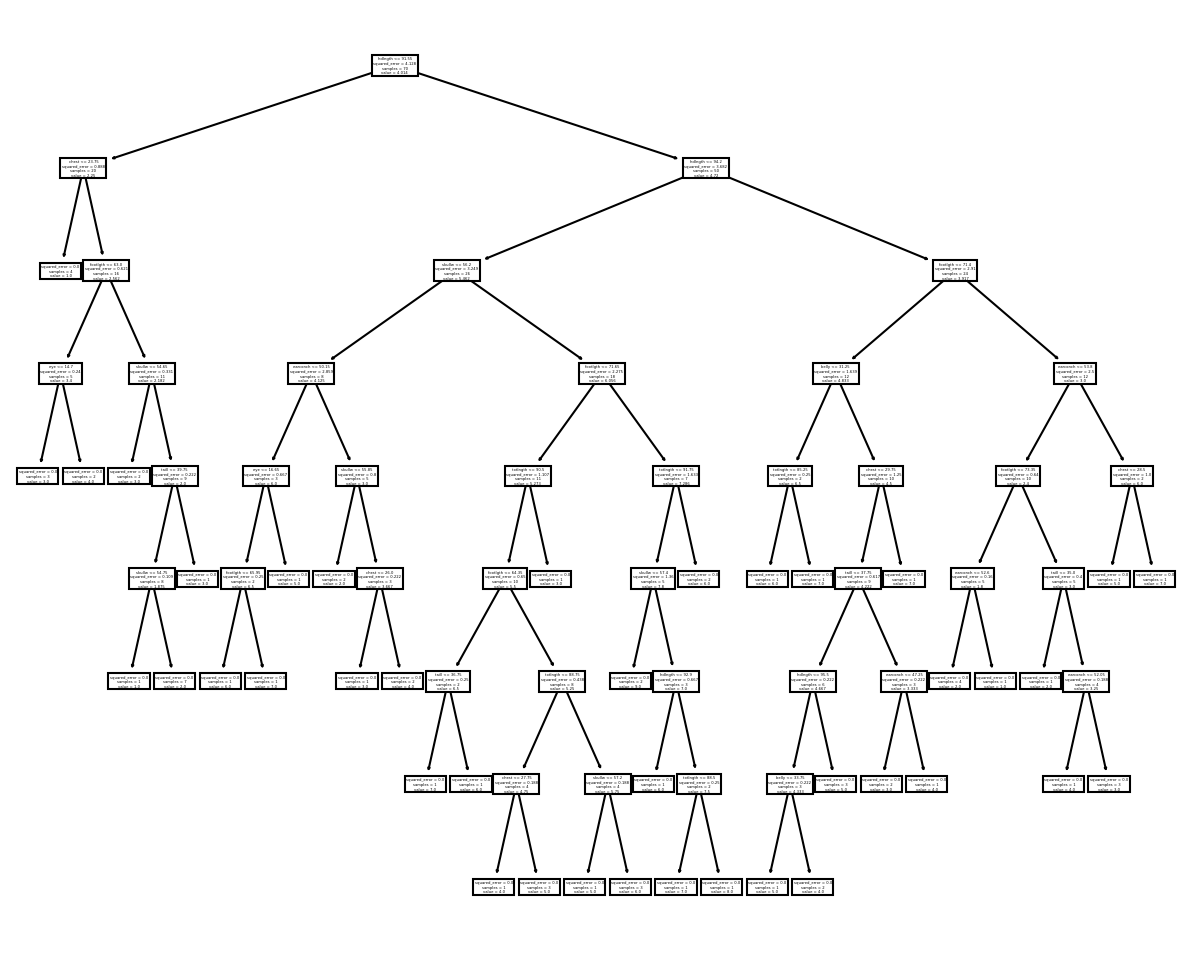

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns);

For now, don’t worry too much about what you see. What’s important is that now you know how to predict a numerical value with a regression tree, but keep in mind that regression trees are usually not used for making numerical estimations!